In [3]:
import torch
import matplotlib.pyplot as plt
import ESN
import time
import numpy as np
import json
torch.set_default_device("cuda:0")
torch.set_default_dtype(torch.double)

In [4]:
sigmas = torch.linspace(0.1,2.0,39)

ipcs=torch.tensor(())
for sigma in sigmas:
    ipc=[]
    fn = f"100N_{sigma}s"
    mfs = torch.load(f"./experiments/mfs/{fn}_mf.pt")
    c_d = torch.load(f"./experiments/ipcs/{fn}_cd.pt")
    capacities = c_d[0]
    dgrs = c_d[1]
    
    
    totMC=float(torch.sum(mfs))
    totCapacity = totMC+float(torch.sum(capacities))
    print("totoal capacity:",totCapacity)
    #print("MC:",totMC)
    c_2nd=torch.sum(capacities[torch.argwhere(dgrs==2)])
    c_3rd=torch.sum(capacities[torch.argwhere(dgrs==3)])
    c_4th=torch.sum(capacities[torch.argwhere(dgrs==4)])
    c_5th=torch.sum(capacities[torch.argwhere(dgrs==5)])
    """
    print("2nd order ipc:",float(c_2nd))
    print("3rd order ipc:",float(c_3rd))
    print("4th order ipc:",float(c_4th))
    print("5th order ipc:",float(c_5th))
    """
    ipc = torch.tensor([totMC,c_2nd,c_3rd,c_4th,c_5th])
    ipcs = torch.cat((ipcs,ipc.unsqueeze(0)),0)



totoal capacity: 86.02329714510361
totoal capacity: 81.31197083812299
totoal capacity: 80.31906142795566
totoal capacity: 81.62038846000735
totoal capacity: 84.09173662451212
totoal capacity: 87.11037884079188
totoal capacity: 90.36450204034203
totoal capacity: 93.68253118699204
totoal capacity: 96.95742090593097
totoal capacity: 100.12126223766572
totoal capacity: 103.13649416432133
totoal capacity: 105.9885863255563
totoal capacity: 108.67558813955802
totoal capacity: 111.19899408044441
totoal capacity: 113.5593686422392
totoal capacity: 115.75517374211834
totoal capacity: 117.78239804939696
totoal capacity: 119.63434313645716
totoal capacity: 121.30196285922662
totoal capacity: 122.77501538879815
totoal capacity: 124.04381317337568
totoal capacity: 125.10108446129489
totoal capacity: 125.94346849244441
totoal capacity: 126.57234716612939
totoal capacity: 126.99394310494931
totoal capacity: 127.21879829264557
totoal capacity: 127.26084772606062
totoal capacity: 127.13631967198512
tot

tensor([0.1000, 0.1500, 0.2000, 0.2500, 0.3000, 0.3500, 0.4000, 0.4500, 0.5000,
        0.5500, 0.6000, 0.6500, 0.7000, 0.7500, 0.8000, 0.8500, 0.9000, 0.9500,
        1.0000, 1.0500, 1.1000, 1.1500, 1.2000, 1.2500, 1.3000, 1.3500, 1.4000,
        1.4500, 1.5000, 1.5500, 1.6000, 1.6500, 1.7000, 1.7500, 1.8000, 1.8500,
        1.9000, 1.9500, 2.0000], device='cuda:0')


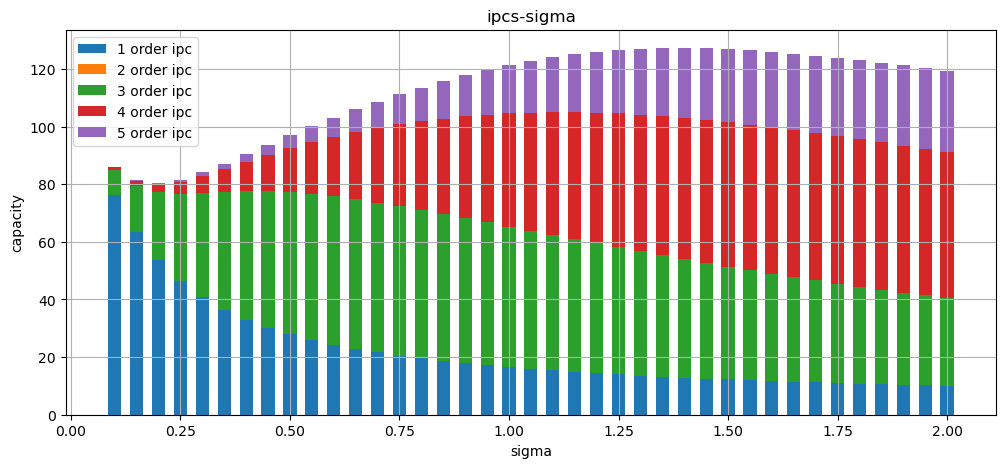

In [5]:
plt.figure(figsize=(12,5))
bottom=np.zeros(39)
print(sigmas)
for i in range(5):
    plt.bar(sigmas.cpu().numpy(),ipcs[:,i].cpu().numpy(),bottom=bottom,width=0.03,label=f"{i+1} order ipc")
    bottom+=ipcs[:,i].cpu().numpy()
plt.grid(True)
plt.title("ipcs-sigma")
plt.xlabel("sigma")
plt.ylabel("capacity")
plt.legend()

In [6]:
print(capacities[torch.argwhere(dgrs==2)].shape)

torch.Size([465, 1])
